In [2]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

%matplotlib inline

In [3]:
G = nx.Graph()

with open('airports/global-net.dat', 'r') as file:
    for line in file:
        node1, node2 = line.strip().split()
        G.add_edge(node1, node2)

print('total number nodes and edges:', G.number_of_nodes(), G.number_of_edges())

total number nodes and edges: 3618 14142


In [4]:
num_components = nx.number_connected_components(G)
print(f"Number of connected components: {num_components}")

largest_component = max(nx.connected_components(G), key=len)

largest_subgraph = G.subgraph(largest_component)

num_nodes = largest_subgraph.number_of_nodes()
num_edges = largest_subgraph.number_of_edges()

print(f"Largest component contains {num_nodes} nodes and {num_edges} edges.")

Number of connected components: 1
Largest component contains 3618 nodes and 14142 edges.


In [5]:
node_name_map = {}

with open('airports/global-cities.dat', 'r') as file:
    for line in file:
        content = line.strip().split('|')
        if len(content) >= 2:
            node_name = content[0]
            node_index = int(content[1])
            city_name = content[2]
            node_name_map[node_index] = node_name, city_name
            
degree_tuple = sorted(largest_subgraph.degree(), key=lambda x: x[1], reverse=True)[:10]
degree_tuple_with_names = [(node_name_map.get(int(node_idx)), degree) for node_idx, degree in degree_tuple]
for name, degree in degree_tuple_with_names:
    print(f"Node: {name}, Degree: {degree}")

Node: ('PAR', 'Paris'), Degree: 250
Node: ('LON', 'London (GB)'), Degree: 242
Node: ('FRA', 'Frankfurt'), Degree: 237
Node: ('AMS', 'Amsterdam'), Degree: 192
Node: ('MOW', 'Moscow'), Degree: 186
Node: ('CHI', 'Chicago'), Degree: 184
Node: ('NYC', 'New York'), Degree: 179
Node: ('ATL', 'Atlanta'), Degree: 172
Node: ('DFW', 'Dallas/Fort Worth'), Degree: 147
Node: ('HOU', 'Houston'), Degree: 144


C:\Users\lenovo\AppData\Local\Temp\ipykernel_25728\2764731079.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


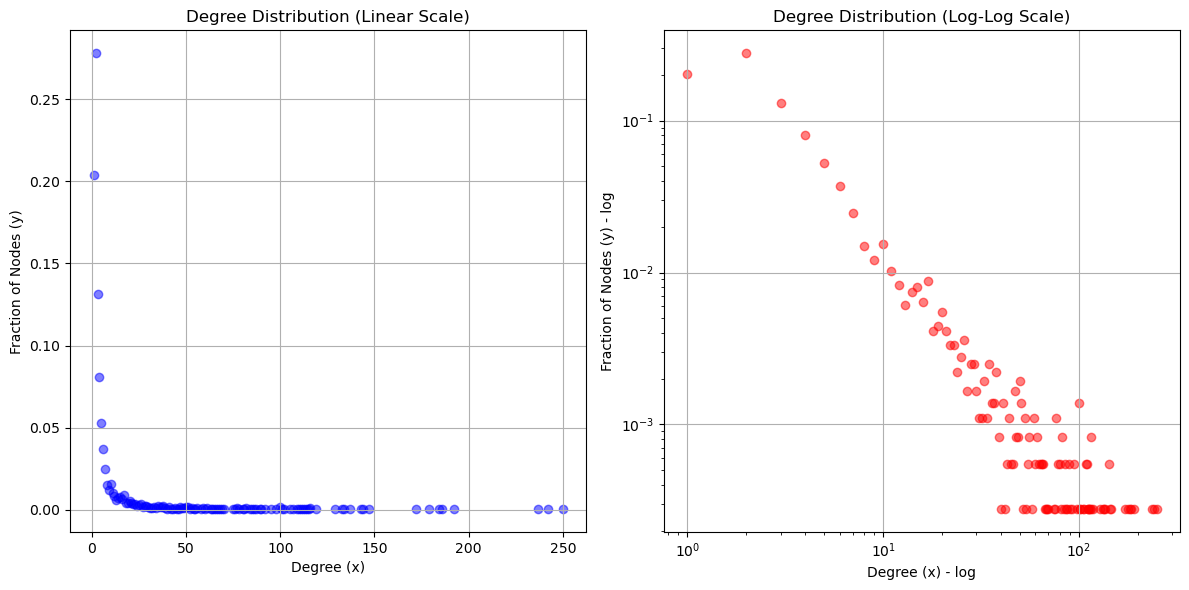

In [6]:
degree_sequence = [degree for node, degree in G.degree()]
degree_count = defaultdict(int)
for degree in degree_sequence:
    degree_count[degree] += 1

total_nodes = G.number_of_nodes()
x = []
y = []
for degree, count in degree_count.items():
    if count > 0:
        x.append(degree)
        y.append(count / total_nodes)

plt.figure(figsize=(12, 6))

min_degree = min(x)
max_degree = max(x)
plt.xlim(min_degree, max_degree)
plt.ylim(min(y), max(y))

plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title('Degree Distribution (Linear Scale)')
plt.xlabel('Degree (x)')
plt.ylabel('Fraction of Nodes (y)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(x, y, color='red', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Degree Distribution (Log-Log Scale)')
plt.xlabel('Degree (x) - log')
plt.ylabel('Fraction of Nodes (y) - log')
plt.grid(True)

plt.tight_layout()
plt.show()

In [21]:
diameter = nx.diameter(largest_subgraph, usebounds=False)
print(f"The diameter of the largest component is: {diameter}")

longest_path = max(nx.all_pairs_shortest_path_length(largest_subgraph), key=lambda x: max(x[1].values()))
start_node = longest_path[0]
end_node = max(longest_path[1], key=longest_path[1].get)

path = nx.shortest_path(largest_subgraph, source=str(start_node), target=str(end_node))
path_cities = [(node_name_map.get(int(node_idx))) for node_idx in path]
for name in path_cities:
    print(f"Node: {name}")

The diameter of the largest component is: 17
Node: ('BZZ', 'Brize Norton')
Node: ('ASI', 'Georgetown (XV)')
Node: ('MPN', 'Mount Pleasant')
Node: ('PUQ', 'Punta Arenas')
Node: ('CCP', 'Concepcion (CL)')
Node: ('SCL', 'Santiago (CL)')
Node: ('BUE', 'Buenos Aires')
Node: ('AKL', 'Auckland')
Node: ('BNE', 'Brisbane')
Node: ('POM', 'Port Moresby')
Node: ('LAE', 'Lae')
Node: ('IDN', 'Indagen')
Node: ('KGB', 'Konge')
Node: ('KBM', 'Kabwum')
Node: ('SWG', 'Satwag')
Node: ('DER', 'Derim')
Node: ('KYX', 'Yalumet')
Node: ('WSU', 'Wasu')


In [22]:
path = nx.shortest_path(G, source=str(501), target=str(635))
path_cities = [(node_name_map.get(int(node_idx))) for node_idx in path]
for name in path_cities:
    print(f"Node: {name}")

Node: ('CBR', 'Canberra')
Node: ('MEL', 'Melbourne (AU)')
Node: ('MRU', 'Mauritius')
Node: ('CPT', 'Cape Town')


In [26]:
betweenness_centrality = nx.betweenness_centrality(G)
top_10_cities = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_cities_names = [(node_name_map.get(int(node_idx)), centrality) for node_idx, centrality in top_10_cities]
print("Top 10 cities/airports by betweenness centrality:")
for city, centrality in top_10_cities_names:
    print(f"{city}: {centrality:.6f}")

Top 10 cities/airports by betweenness centrality:
('PAR', 'Paris'): 0.093420
('LON', 'London (GB)'): 0.084989
('ANC', 'Anchorage'): 0.081523
('SIN', 'Singapore'): 0.075362
('NYC', 'New York'): 0.069283
('LAX', 'Los Angeles (US)'): 0.066250
('FRA', 'Frankfurt'): 0.065578
('POM', 'Port Moresby'): 0.064323
('TYO', 'Tokyo'): 0.060243
('SEA', 'Seattle'): 0.052379
